In [1]:
import pandas as pd
df = pd.read_excel('/Users/ramfeuji/Documents/ Trail New/Real estate valuation data set.xlsx')

In [2]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [10]:
df_new = df[[
    'X2 house age', 
    'X3 distance to the nearest MRT station', 
    'X4 number of convenience stores',
    'Y house price of unit area'
]]

In [13]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_new)

In [14]:
train_data

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
352,18.4,2674.9610,3,25.7
130,29.6,535.5270,8,37.5
7,20.3,287.6025,6,46.7
20,4.5,2275.8770,3,29.3
30,25.9,4519.6900,0,22.1
...,...,...,...,...
339,1.7,329.9747,5,50.4
95,8.0,104.8101,5,51.8
220,37.2,186.5101,9,78.3
121,13.6,492.2313,5,48.0


In [15]:
X_data = train_data.drop(columns=['Y house price of unit area'])
Y_data = train_data['Y house price of unit area']

Intercept: 42.67779915946035
Coefficients: [-0.26131772 -0.00560937  1.33565427]

Regression Metrics:
R² Score: 0.5159254122163569
Mean Squared Error: 92.09928052943101
Mean Absolute Error: 6.945317369628539

Classification Metrics:
Accuracy: 0.8387096774193549
Precision: 0.8108108108108109
Recall: 0.9090909090909091

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        29
           1       0.81      0.91      0.86        33

    accuracy                           0.84        62
   macro avg       0.85      0.83      0.84        62
weighted avg       0.84      0.84      0.84        62



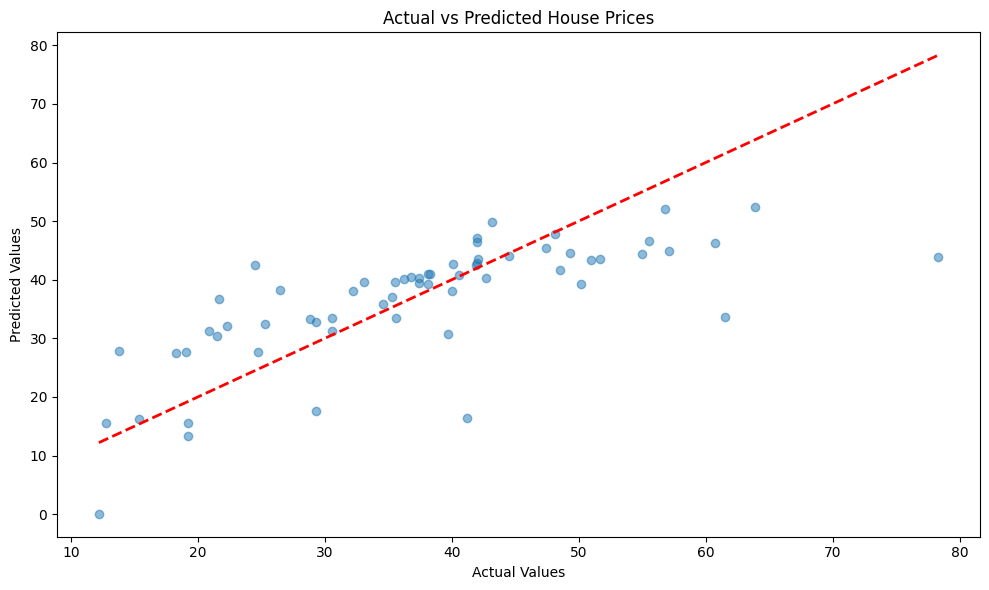

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (Y)
X_data = train_data.drop(columns=['Y house price of unit area'])
Y_data = train_data['Y house price of unit area']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Calculate regression metrics
print("\nRegression Metrics:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

# For classification metrics, we need to convert predictions to binary
# This is optional and depends on your specific needs
threshold = y_test.mean()  # or any other threshold you choose
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred > threshold).astype(int)

print("\nClassification Metrics:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_binary))
print("Precision:", precision_score(y_test_binary, y_pred_binary))
print("Recall:", recall_score(y_test_binary, y_pred_binary))
print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred_binary))

# Optional: Plot actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()